### ACS-DF Wrangled

In [151]:
import pandas as pd
import numpy as np
acs_df = pd.read_csv('/kaggle/input/datathon/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')

In [152]:
acs_df['Label (Grouping)'] = acs_df['Label (Grouping)'].str.strip()

In [153]:
# Since there was an issue with the direct preview, let's try loading and processing the file without previewing

acs_data = acs_df
# Assuming the dataset structure matches the earlier description, with 'Header' rows indicating new categories
# We'll create separate DataFrames for each category based on the 'Header' rows and appropriately label subcategories

# Find the 'Header' rows which indicate the start of a new category
header_indices = acs_data[acs_data['Category'] == 'Header'].index

# Initialize an empty dictionary to hold the DataFrames
category_dfs = {}

# Iterate through each header to separate and label the DataFrames
for i, start_idx in enumerate(header_indices):
    # Determine the end of the current category segment
    if i < len(header_indices) - 1:
        end_idx = header_indices[i + 1]
    else:
        end_idx = len(acs_data)
    
    # Extract the category DataFrame
    category_df = acs_data.iloc[start_idx:end_idx].copy()
    
    # Use the first row's 'Label (Grouping)' as the category name
    category_name = category_df.iloc[0]['Label (Grouping)']
    
    # Remove the header row and reset index
    category_df = category_df.iloc[1:].reset_index(drop=True)
    
    # Label subcategories for clarity
    category_df['Category'] = category_name
    
    # Store the DataFrame in the dictionary
    category_dfs[category_name] = category_df

# To check if the operation was successful, let's list the categories and show the shape of one of the DataFrames
list(category_dfs.keys()), category_dfs[next(iter(category_dfs))].shape


(['EMPLOYMENT STATUS',
  'COMMUTING TO WORK',
  'OCCUPATION',
  'INDUSTRY',
  'CLASS OF WORKER',
  'INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)',
  'HEALTH INSURANCE COVERAGE',
  'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL',
  'INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)',
  'INCOME AND BENEFITS (IN 

In [154]:
category_dfs['EMPLOYMENT STATUS']['Year']


0     2021
1     2021
2     2021
3     2021
4     2021
5     2021
6     2021
7     2021
8     2021
9     2021
10    2021
11    2021
12    2021
13    2021
14    2021
15    2021
16    2021
Name: Year, dtype: int64

In [155]:
def get_header_indices(df):
    return df.index[df['Category'] == 'Header'].tolist()

header_indices = get_header_indices(acs_df)

split_dataframes = []

for i, start_index in enumerate(header_indices):
    if i < len(header_indices) - 1:
        end_index = header_indices[i + 1]
    else:
        end_index = len(acs_df)
    
    segment_df = acs_df[start_index:end_index]
    
    header_value = segment_df.iloc[0]['Label (Grouping)']
    
    segment_df = segment_df.drop(index=start_index).reset_index(drop=True)
    
    segment_df['Segment'] = header_value
    
    split_dataframes.append(segment_df)

split_df = pd.concat(split_dataframes).reset_index(drop=True)

split_df.head()  


,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year,Segment
0,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010,EMPLOYMENT STATUS
1,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010,EMPLOYMENT STATUS
2,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010,EMPLOYMENT STATUS
3,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010,EMPLOYMENT STATUS
4,Unemployed,EMPLOYMENT STATUS,Alabama,"194,012","±3,179",5.2%,±0.1,2010,EMPLOYMENT STATUS


In [156]:
acs_dict = {}

In [157]:
unique_headers = list(acs_df[acs_df['Category'] == 'Header']['Label (Grouping)'].unique())
unique_headers

['EMPLOYMENT STATUS',
 'COMMUTING TO WORK',
 'OCCUPATION',
 'INDUSTRY',
 'CLASS OF WORKER',
 'INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)',
 'HEALTH INSURANCE COVERAGE',
 'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL',
 'INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)',
 'INCOME AND BENEFITS (IN 2021 INFLATION-ADJUS

In [158]:
for header in unique_headers:
    acs_dict[header] = split_df[split_df['Segment'] == header]

In [159]:
acs_dict['COMMUTING TO WORK']

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year,Segment
17,Workers 16 years and over,COMMUTING TO WORK,Alabama,"2,000,289","±6,235","2,000,289",(X),2010,COMMUTING TO WORK
18,"Car, truck, or van -- drove alone",COMMUTING TO WORK,Alabama,"1,672,185","±7,114",83.6%,±0.2,2010,COMMUTING TO WORK
19,"Car, truck, or van -- carpooled",COMMUTING TO WORK,Alabama,"222,349","±3,524",11.1%,±0.2,2010,COMMUTING TO WORK
20,Public transportation (excluding taxicab),COMMUTING TO WORK,Alabama,"9,062",±673,0.5%,±0.1,2010,COMMUTING TO WORK
21,Walked,COMMUTING TO WORK,Alabama,"25,007","±1,487",1.3%,±0.1,2010,COMMUTING TO WORK
...,...,...,...,...,...,...,...,...,...
92495,Public transportation (excluding taxicab),COMMUTING TO WORK,Puerto Rico,"13,698","±1,015",1.3%,±0.1,2021,COMMUTING TO WORK
92496,Walked,COMMUTING TO WORK,Puerto Rico,"25,891","±1,478",2.5%,±0.1,2021,COMMUTING TO WORK
92497,Other means,COMMUTING TO WORK,Puerto Rico,"17,311","±1,237",1.7%,±0.1,2021,COMMUTING TO WORK
92498,Worked from home,COMMUTING TO WORK,Puerto Rico,"42,947","±1,963",4.2%,±0.2,2021,COMMUTING TO WORK


In [160]:
acs_dict['EMPLOYMENT STATUS'].head(17)
#acs-dict is a mapping of the dataframe you want based on the header
#just type the header key in acs_dict to retrieve respective df

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year,Segment
0,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010,EMPLOYMENT STATUS
1,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010,EMPLOYMENT STATUS
2,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010,EMPLOYMENT STATUS
3,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010,EMPLOYMENT STATUS
4,Unemployed,EMPLOYMENT STATUS,Alabama,"194,012","±3,179",5.2%,±0.1,2010,EMPLOYMENT STATUS
5,Armed Forces,EMPLOYMENT STATUS,Alabama,"15,969",±888,0.4%,±0.1,2010,EMPLOYMENT STATUS
6,Not in labor force,EMPLOYMENT STATUS,Alabama,"1,467,656","±5,401",39.5%,±0.1,2010,EMPLOYMENT STATUS
7,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531","2,230,879",(X),2010,EMPLOYMENT STATUS
8,Percent Unemployed,EMPLOYMENT STATUS,Alabama,(X),(X),8.7%,±0.1,2010,EMPLOYMENT STATUS
9,Females 16 years and over,EMPLOYMENT STATUS,Alabama,"1,939,093","±1,296","1,939,093",(X),2010,EMPLOYMENT STATUS


In [161]:
acs_dict['EMPLOYMENT STATUS'].shape

(11492, 9)

### American health and obesity df Wrangled

In [163]:
import pandas as pd

In [164]:
nutrition_dataset = pd.read_csv('/kaggle/input/datathon/Nutrition_Physical_Activity_and_Obesity_Data.csv')
nutrition_dataset

/tmp/ipykernel_33/2079756566.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_dataset = pd.read_csv('/kaggle/input/datathon/Nutrition_Physical_Activity_and_Obesity_Data.csv')


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily,NaN,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,NaN,Value,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who participate in daily physical education,NaN,Value,...,"(40.485010283, -88.997710178)",PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,NaN,Value,...,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133340,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"Less than $15,000",INC,INCLESS15
133341,2022,2022,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,Less than high school,EDU,EDUHS
133342,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Age (years),35 - 44,AGEYR,AGEYR3544
133343,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"$35,000 - $49,999",INC,INC3550


In [165]:
nutrition_dataset.iloc[28188]

YearStart                                                                                                          2017
YearEnd                                                                                                            2017
LocationAbbr                                                                                                         SC
LocationDesc                                                                                             South Carolina
Datasource                                                                      Youth Risk Behavior Surveillance System
Class                                                                                                Television Viewing
Topic                                                                                     Television Viewing - Behavior
Question                      Percent of students in grades 9-12 watching 3 or more hours of television each school day
Data_Value_Unit                         

In [166]:
mask = (pd.notna(nutrition_dataset['Data_Value']) & pd.notna(nutrition_dataset['Data_Value_Alt'])) & (nutrition_dataset['Data_Value'] != nutrition_dataset['Data_Value_Alt'])
value_df = nutrition_dataset[mask]  
value_df[['Data_Value',  'Data_Value_Alt']] #confirms Data_Value == Data_Value_Alt

,Data_Value,Data_Value_Alt


In [167]:
nutrition_dataset['Data_Value_Unit'].value_counts()

Series([], Name: count, dtype: int64)

In [168]:
nutrition_dataset[pd.notna(nutrition_dataset['Data_Value_Unit']) == True]['Data_Value_Unit']

Series([], Name: Data_Value_Unit, dtype: float64)

In [169]:
nutrition_dataset[['Class', 'Topic']]

,Class,Topic
0,Physical Activity,Physical Activity - Behavior
1,Obesity / Weight Status,Obesity / Weight Status
2,Obesity / Weight Status,Obesity / Weight Status
3,Physical Activity,Physical Activity - Behavior
4,Obesity / Weight Status,Obesity / Weight Status
...,...,...
133340,Obesity / Weight Status,Obesity / Weight Status
133341,Physical Activity,Physical Activity - Behavior
133342,Obesity / Weight Status,Obesity / Weight Status
133343,Obesity / Weight Status,Obesity / Weight Status


In [170]:
nutrition_dataset

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily,NaN,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,NaN,Value,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who participate in daily physical education,NaN,Value,...,"(40.485010283, -88.997710178)",PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,NaN,Value,...,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133340,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"Less than $15,000",INC,INCLESS15
133341,2022,2022,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,Less than high school,EDU,EDUHS
133342,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Age (years),35 - 44,AGEYR,AGEYR3544
133343,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"$35,000 - $49,999",INC,INC3550


In [171]:
mask = (pd.notna(nutrition_dataset['YearStart']) & pd.notna(nutrition_dataset['YearEnd'])) & (nutrition_dataset['YearStart'] != nutrition_dataset['YearEnd'])
yearly_df = nutrition_dataset[mask]
yearly_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1


In [172]:
len(list(nutrition_dataset['Topic'].unique()))

5

In [173]:
nutrition_dataset['Data_Value_Footnote_Symbol'].unique()

array([nan, '-', '~'], dtype=object)

In [174]:
#removal of redundant features

In [175]:
nutrition_dataset.drop(columns = ['Data_Value_Alt','Class','ClassID','Datasource','Data_Value_Unit', 'YearStart','LocationAbbr','Data_Value_Type', 'DataValueTypeID', 'Data_Value_Footnote_Symbol'], inplace=True)
nutrition_dataset.drop(columns = ['StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1'], inplace=True)

In [176]:
nutrition_dataset

,YearEnd,LocationDesc,Topic,Question,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Grade,Income,Race/Ethnicity,GeoLocation,TopicID,QuestionID,LocationID
0,2019,Alaska,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily,9.6,NaN,5.5,16.5,130.0,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(64.845079957001, -147.722059036)",PA1,Q048,2
1,2019,Arizona,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,13.3,NaN,10.7,16.5,1739.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,"(34.86597028, -111.763811277)",OWS1,Q038,4
2,2019,District of Columbia,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,17.1,NaN,16.2,17.9,8978.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,"(38.890371385, -77.031961127)",OWS1,Q038,11
3,2019,Illinois,Physical Activity - Behavior,Percent of students in grades 9-12 who participate in daily physical education,65.9,NaN,49.8,79.1,876.0,NaN,NaN,NaN,NaN,10th,NaN,NaN,"(40.485010283, -88.997710178)",PA1,Q049,17
4,2019,Maryland,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,16.7,NaN,14.5,19.2,2573.0,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,"(39.290580964, -76.609260111)",OWS1,Q039,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133340,2022,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,24.5,NaN,16.3,35.3,111.0,NaN,NaN,NaN,NaN,NaN,"Less than $15,000",NaN,"(43.23554134300048, -108.10983035299967)",OWS1,Q037,56
133341,2022,Wyoming,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,36.0,NaN,27.9,45.0,159.0,NaN,NaN,Less than high school,NaN,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",PA1,Q047,56
133342,2022,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,35.2,NaN,30.6,40.0,450.0,NaN,35 - 44,NaN,NaN,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",OWS1,Q036,56
133343,2022,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,35.3,NaN,30.2,40.7,512.0,NaN,NaN,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(43.23554134300048, -108.10983035299967)",OWS1,Q037,56


In [177]:
nutrition_dataset['YearEnd'] = pd.to_datetime(nutrition_dataset['YearEnd'].astype(str))

In [178]:
nutrition_dataset = nutrition_dataset.sort_values(by='YearEnd')
nutrition_dataset

,YearEnd,LocationDesc,Topic,Question,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Grade,Income,Race/Ethnicity,GeoLocation,TopicID,QuestionID,LocationID
32788,2001-01-01,North Dakota,Physical Activity - Behavior,Percent of students in grades 9-12 who participate in daily physical education,30.8,NaN,25.0,37.3,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,"(47.475319779, -100.118421049)",PA1,Q049,38
21310,2001-01-01,Maine,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,NaN,Data not available because sample size is insufficient or data not reported.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(45.254228894001, -68.985031336)",OWS1,Q039,23
8946,2001-01-01,Maine,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume fruit less than 1 time daily,35.3,NaN,31.4,39.4,1093.0,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,"(45.254228894001, -68.985031336)",FV1,Q020,23
2025,2001-01-01,Massachusetts,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,15.0,NaN,12.6,17.7,1032.0,NaN,NaN,NaN,NaN,10th,NaN,NaN,"(42.27687047, -72.082690675)",OWS1,Q039,25
8941,2001-01-01,Montana,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,NaN,Data not available because sample size is insufficient or data not reported.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,"(47.066528972, -109.424420645)",OWS1,Q038,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130261,2022-01-01,Kansas,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,32.4,NaN,28.5,36.5,1048.0,NaN,NaN,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(38.34774030000045, -98.20078122699965)",OWS1,Q037,20
130260,2022-01-01,Kansas,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,27.3,NaN,24.7,30.0,1967.0,NaN,55 - 64,NaN,NaN,NaN,NaN,NaN,"(38.34774030000045, -98.20078122699965)",PA1,Q047,20
130259,2022-01-01,Kansas,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,33.4,NaN,32.2,34.7,10179.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,"(38.34774030000045, -98.20078122699965)",OWS1,Q037,20
130167,2022-01-01,Illinois,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,18.8,NaN,15.4,22.7,669.0,NaN,35 - 44,NaN,NaN,NaN,NaN,NaN,"(40.48501028300046, -88.99771017799969)",PA1,Q047,17


In [179]:
nutrition_dataset['YearEnd'] = nutrition_dataset['YearEnd'].astype(str)

In [180]:
nutrition_dataset['YearEnd'] = nutrition_dataset['YearEnd'].str[0:4]

In [181]:
nutrition_dataset

,YearEnd,LocationDesc,Topic,Question,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Grade,Income,Race/Ethnicity,GeoLocation,TopicID,QuestionID,LocationID
32788,2001,North Dakota,Physical Activity - Behavior,Percent of students in grades 9-12 who participate in daily physical education,30.8,NaN,25.0,37.3,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,"(47.475319779, -100.118421049)",PA1,Q049,38
21310,2001,Maine,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,NaN,Data not available because sample size is insufficient or data not reported.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(45.254228894001, -68.985031336)",OWS1,Q039,23
8946,2001,Maine,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume fruit less than 1 time daily,35.3,NaN,31.4,39.4,1093.0,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,"(45.254228894001, -68.985031336)",FV1,Q020,23
2025,2001,Massachusetts,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,15.0,NaN,12.6,17.7,1032.0,NaN,NaN,NaN,NaN,10th,NaN,NaN,"(42.27687047, -72.082690675)",OWS1,Q039,25
8941,2001,Montana,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,NaN,Data not available because sample size is insufficient or data not reported.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,"(47.066528972, -109.424420645)",OWS1,Q038,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130261,2022,Kansas,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,32.4,NaN,28.5,36.5,1048.0,NaN,NaN,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(38.34774030000045, -98.20078122699965)",OWS1,Q037,20
130260,2022,Kansas,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,27.3,NaN,24.7,30.0,1967.0,NaN,55 - 64,NaN,NaN,NaN,NaN,NaN,"(38.34774030000045, -98.20078122699965)",PA1,Q047,20
130259,2022,Kansas,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,33.4,NaN,32.2,34.7,10179.0,Total,NaN,NaN,NaN,NaN,NaN,NaN,"(38.34774030000045, -98.20078122699965)",OWS1,Q037,20
130167,2022,Illinois,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,18.8,NaN,15.4,22.7,669.0,NaN,35 - 44,NaN,NaN,NaN,NaN,NaN,"(40.48501028300046, -88.99771017799969)",PA1,Q047,17


In [182]:
nutrition_dataset = nutrition_dataset.sort_values(by='LocationDesc')

In [183]:
nutrition_dataset

,YearEnd,LocationDesc,Topic,Question,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Grade,Income,Race/Ethnicity,GeoLocation,TopicID,QuestionID,LocationID
94603,2013,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,18.7,NaN,15.7,22.1,999.0,NaN,NaN,NaN,NaN,NaN,"$75,000 or greater",NaN,"(32.840571122, -86.631860762)",PA1,Q044,1
930,2019,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,18.8,NaN,14.0,24.8,392.0,NaN,NaN,NaN,NaN,12th,NaN,NaN,"(32.840571122, -86.631860762)",OWS1,Q038,1
83807,2019,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),28.1,NaN,25.5,30.8,1807.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",PA1,Q045,1
90201,2013,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,20.1,NaN,16.1,24.8,707.0,NaN,NaN,NaN,NaN,NaN,"$50,000 - $74,999",NaN,"(32.840571122, -86.631860762)",PA1,Q044,1
129012,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,34.5,NaN,29.6,39.7,477.0,NaN,35 - 44,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS1,Q037,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94534,2019,Wyoming,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetables less than one time daily,20.4,NaN,17.9,23.1,1824.0,NaN,NaN,NaN,Male,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",FV1,Q019,56
84972,2013,Wyoming,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),64.1,NaN,61.2,66.9,1967.0,NaN,NaN,College graduate,NaN,NaN,NaN,NaN,"(43.235541343, -108.109830353)",PA1,Q043,56
30948,2015,Wyoming,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,34.0,NaN,30.6,37.5,1166.0,NaN,NaN,NaN,Female,NaN,NaN,NaN,"(43.235541343, -108.109830353)",FV1,Q021,56
30923,2015,Wyoming,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,34.4,NaN,32.0,36.9,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,"(43.235541343, -108.109830353)",FV1,Q021,56


In [184]:
nutrition_dataset['Income'].unique()

array(['$75,000 or greater', nan, '$50,000 - $74,999',
       '$35,000 - $49,999', 'Data not reported', '$25,000 - $34,999',
       '$15,000 - $24,999', 'Less than $15,000'], dtype=object)

In [185]:
ethnicity_df = nutrition_dataset[['YearEnd', 'LocationDesc', 'Topic', 'Question', 'QuestionID', 'Data_Value', 'Race/Ethnicity']]
ethnicity_df

,YearEnd,LocationDesc,Topic,Question,QuestionID,Data_Value,Race/Ethnicity
94603,2013,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Q044,18.7,NaN
930,2019,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,Q038,18.8,NaN
83807,2019,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Q045,28.1,NaN
90201,2013,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Q044,20.1,NaN
129012,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,Q037,34.5,NaN
...,...,...,...,...,...,...,...
94534,2019,Wyoming,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetables less than one time daily,Q019,20.4,NaN
84972,2013,Wyoming,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Q043,64.1,NaN
30948,2015,Wyoming,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,Q021,34.0,NaN
30923,2015,Wyoming,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,Q021,34.4,Non-Hispanic White


In [186]:
nutrition_dataset[nutrition_dataset['Topic'] == 'Physical Activity - Behavior']['Question'].unique()

array(['Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of s

In [187]:
import pandas as pd

question_map = {}
for question in nutrition_dataset['Question'].unique():
    question_id = nutrition_dataset[nutrition_dataset['Question'] == question]['QuestionID'].iloc[0]
    question_map[question_id] = question  # Here, map the question ID to the question text

question_map_df = pd.DataFrame(list(question_map.items()), columns=['QuestionID', 'Question'])
pd.set_option('display.max_colwidth', None)


question_map_df
#Q048, Q049

,QuestionID,Question
0,Q044,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
1,Q038,Percent of students in grades 9-12 who have obesity
2,Q045,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
3,Q037,Percent of adults aged 18 years and older who have an overweight classification
4,Q059,Percent of students in grades 9-12 watching 3 or more hours of television each school day
5,Q047,Percent of adults who engage in no leisure-time physical activity
6,Q048,Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily
7,Q018,Percent of adults who report consuming fruit less than one time daily
8,Q043,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
9,Q046,Percent of adults who engage in muscle-strengthening activities on 2 or more days a week


In [188]:
fruit_questions = ['Q021', 'Q018']
fruit_dataset = nutrition_dataset[nutrition_dataset['QuestionID'].isin(fruit_questions)]

In [189]:
sorted(fruit_dataset['YearEnd'].unique())

['2001',
 '2003',
 '2005',
 '2007',
 '2009',
 '2011',
 '2013',
 '2015',
 '2017',
 '2019',
 '2021']

In [190]:
soda_question = ['Q058']
soda_dataset= nutrition_dataset[nutrition_dataset['QuestionID'].isin(soda_question)]

In [191]:
soda_dataset = soda_dataset.dropna(subset=['Data_Value']).groupby('LocationDesc')[['YearEnd', 'LocationDesc', 'Data_Value']].head()

In [192]:
sorted(soda_dataset['YearEnd'].unique())

['2007', '2009', '2011', '2013', '2015', '2017', '2019']

In [193]:
soda_dataset[soda_dataset['LocationDesc'] == 'Utah']

,YearEnd,LocationDesc,Data_Value
33102,2007,Utah,17.2
29563,2011,Utah,17.4
35541,2007,Utah,16.6
23456,2009,Utah,17.7
29662,2009,Utah,9.2


In [194]:
fruit_dataset = fruit_dataset.dropna(subset=['Data_Value']).groupby('LocationDesc')[['YearEnd', 'LocationDesc', 'Data_Value']].head()

In [195]:
fruit_dataset

,YearEnd,LocationDesc,Data_Value
122979,2021,Alabama,44.8
23337,2003,Alabama,55.5
51876,2017,Alabama,36.6
51871,2017,Alabama,44.7
33883,2009,Alabama,44.2
...,...,...,...
18763,2003,Wyoming,21.8
2318,2009,Wyoming,34.7
11560,2003,Wyoming,27.7
70512,2017,Wyoming,36.3


In [196]:
ethnicity_df = nutrition_dataset[['YearEnd', 'LocationDesc', 'Topic', 'Question', 'QuestionID', 'Data_Value', 'Race/Ethnicity']]
ethnicity_df

,YearEnd,LocationDesc,Topic,Question,QuestionID,Data_Value,Race/Ethnicity
94603,2013,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Q044,18.7,NaN
930,2019,Alabama,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,Q038,18.8,NaN
83807,2019,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Q045,28.1,NaN
90201,2013,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,Q044,20.1,NaN
129012,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have an overweight classification,Q037,34.5,NaN
...,...,...,...,...,...,...,...
94534,2019,Wyoming,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetables less than one time daily,Q019,20.4,NaN
84972,2013,Wyoming,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Q043,64.1,NaN
30948,2015,Wyoming,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,Q021,34.0,NaN
30923,2015,Wyoming,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,Q021,34.4,Non-Hispanic White


In [197]:
ethnicity_df = ethnicity_df.dropna(subset=['Race/Ethnicity', 'Data_Value'])
ethnicity_df

,YearEnd,LocationDesc,Topic,Question,QuestionID,Data_Value,Race/Ethnicity
122968,2021,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,45.8,2 or more races
105004,2012,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,26.5,American Indian/Alaska Native
23337,2003,Alabama,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,Q021,55.5,Non-Hispanic Black
67093,2011,Alabama,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Q043,43.0,Non-Hispanic White
51876,2017,Alabama,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit less than one time daily,Q018,36.6,2 or more races
...,...,...,...,...,...,...,...
73209,2017,Wyoming,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit less than one time daily,Q018,41.5,American Indian/Alaska Native
105958,2013,Wyoming,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination),Q043,53.9,Other
127323,2021,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,43.5,2 or more races
17220,2011,Wyoming,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,Q039,10.8,2 or more races


In [198]:
ethnicity_df[ethnicity_df['LocationDesc'] == 'Alabama']['YearEnd'].unique()

array(['2021', '2012', '2003', '2011', '2017', '2019', '2013', '2020',
       '2015', '2016', '2009', '2018', '2022', '2014', '2005', '2001'],
      dtype=object)

In [199]:
ethnicity_df = ethnicity_df.sort_values(by=['YearEnd', 'LocationDesc'], ascending=[True, False]).reset_index(drop=True)

In [200]:
ethnicity_df

,YearEnd,LocationDesc,Topic,Question,QuestionID,Data_Value,Race/Ethnicity
0,2001,Wyoming,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,Q038,6.1,Non-Hispanic White
1,2001,Wyoming,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,Q038,7.6,Hispanic
2,2001,Wyoming,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,Q021,32.4,Hispanic
3,2001,Wyoming,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,Q039,10.7,Non-Hispanic White
4,2001,Wyoming,Physical Activity - Behavior,Percent of students in grades 9-12 who participate in daily physical education,Q049,29.7,Hispanic
...,...,...,...,...,...,...,...
27489,2022,Alabama,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,Q047,29.1,Non-Hispanic White
27490,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,30.8,2 or more races
27491,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,50.2,Non-Hispanic Black
27492,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,35.1,Non-Hispanic White


In [201]:
obesity_question = ['Q038']
grouped_obesity_df = ethnicity_df[ethnicity_df['QuestionID'].isin(obesity_question)]
grouped_obesity_df = grouped_obesity_df.groupby(['YearEnd', 'LocationDesc', 'Race/Ethnicity'])['Data_Value'].mean().reset_index()
grouped_obesity_df = grouped_obesity_df.rename(columns={"Data_Value": "Obesity_Percentage"})
grouped_obesity_df = grouped_obesity_df[grouped_obesity_df['YearEnd'].astype(int) >= 2007]
grouped_obesity_df

,YearEnd,LocationDesc,Race/Ethnicity,Obesity_Percentage
267,2007,Alaska,American Indian/Alaska Native,13.5
268,2007,Alaska,Hispanic,12.0
269,2007,Alaska,Non-Hispanic White,10.0
270,2007,Arizona,American Indian/Alaska Native,19.9
271,2007,Arizona,Hispanic,16.5
...,...,...,...,...
1358,2019,Virginia,Non-Hispanic Black,19.3
1359,2019,Virginia,Non-Hispanic White,12.5
1360,2019,West Virginia,Non-Hispanic White,22.4
1361,2019,Wisconsin,Hispanic,19.1


In [202]:
obesity_question = ['Q039'] #gives better correlation -> keeping Q039 for obesity
grouped_obesity_df = ethnicity_df[ethnicity_df['QuestionID'].isin(obesity_question)]
grouped_obesity_df = grouped_obesity_df.groupby(['YearEnd', 'LocationDesc', 'Race/Ethnicity'])['Data_Value'].mean().reset_index()
grouped_obesity_df = grouped_obesity_df.rename(columns={"Data_Value": "Obesity_Percentage"})
grouped_obesity_df = grouped_obesity_df[grouped_obesity_df['YearEnd'].astype(int) >= 2007]
grouped_obesity_df

,YearEnd,LocationDesc,Race/Ethnicity,Obesity_Percentage
267,2007,Alaska,American Indian/Alaska Native,21.6
268,2007,Alaska,Hispanic,15.8
269,2007,Alaska,Non-Hispanic White,13.8
270,2007,Arizona,American Indian/Alaska Native,13.1
271,2007,Arizona,Hispanic,18.8
...,...,...,...,...
1358,2019,Virginia,Non-Hispanic Black,18.0
1359,2019,Virginia,Non-Hispanic White,15.2
1360,2019,West Virginia,Non-Hispanic White,16.2
1361,2019,Wisconsin,Hispanic,18.5


In [203]:
ethnicity_df

,YearEnd,LocationDesc,Topic,Question,QuestionID,Data_Value,Race/Ethnicity
0,2001,Wyoming,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,Q038,6.1,Non-Hispanic White
1,2001,Wyoming,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,Q038,7.6,Hispanic
2,2001,Wyoming,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume vegetables less than 1 time daily,Q021,32.4,Hispanic
3,2001,Wyoming,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,Q039,10.7,Non-Hispanic White
4,2001,Wyoming,Physical Activity - Behavior,Percent of students in grades 9-12 who participate in daily physical education,Q049,29.7,Hispanic
...,...,...,...,...,...,...,...
27489,2022,Alabama,Physical Activity - Behavior,Percent of adults who engage in no leisure-time physical activity,Q047,29.1,Non-Hispanic White
27490,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,30.8,2 or more races
27491,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,50.2,Non-Hispanic Black
27492,2022,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Q036,35.1,Non-Hispanic White


In [204]:
physical_question = ['Q048']
grouped_physical_df = ethnicity_df[ethnicity_df['QuestionID'].isin(physical_question)]
grouped_physical_df = grouped_physical_df.groupby(['YearEnd', 'LocationDesc', 'Race/Ethnicity'])['Data_Value'].mean().reset_index()
grouped_physical_df = grouped_physical_df.rename(columns={"Data_Value": "Physical_Percentage"})
grouped_physical_df = grouped_physical_df[grouped_physical_df['YearEnd'].astype(int) >= 2007]
grouped_physical_df

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage
0,2007,Alaska,American Indian/Alaska Native,8.3
1,2007,Alaska,Hispanic,20.1
2,2007,Alaska,Non-Hispanic White,21.1
3,2007,Connecticut,Hispanic,18.5
4,2007,Connecticut,Non-Hispanic Black,20.2
...,...,...,...,...
1029,2019,West Virginia,Non-Hispanic White,26.0
1030,2019,Wisconsin,2 or more races,26.8
1031,2019,Wisconsin,Hispanic,18.7
1032,2019,Wisconsin,Non-Hispanic Black,20.6


In [205]:
#correlation with obesity

phys_obs_df = pd.merge(grouped_physical_df, grouped_obesity_df, 
                     on=['YearEnd', 'LocationDesc', 'Race/Ethnicity'], 
                     how='inner')
phys_obs_df

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage
0,2007,Alaska,American Indian/Alaska Native,8.3,21.6
1,2007,Alaska,Hispanic,20.1,15.8
2,2007,Alaska,Non-Hispanic White,21.1,13.8
3,2007,Connecticut,Hispanic,18.5,19.4
4,2007,Connecticut,Non-Hispanic Black,20.2,11.5
...,...,...,...,...,...
1009,2019,Virginia,Non-Hispanic Black,20.9,18.0
1010,2019,Virginia,Non-Hispanic White,23.8,15.2
1011,2019,West Virginia,Non-Hispanic White,26.0,16.2
1012,2019,Wisconsin,Hispanic,18.7,18.5


In [206]:
phys_obs_df.isna().sum()

YearEnd                0
LocationDesc           0
Race/Ethnicity         0
Physical_Percentage    0
Obesity_Percentage     0
dtype: int64

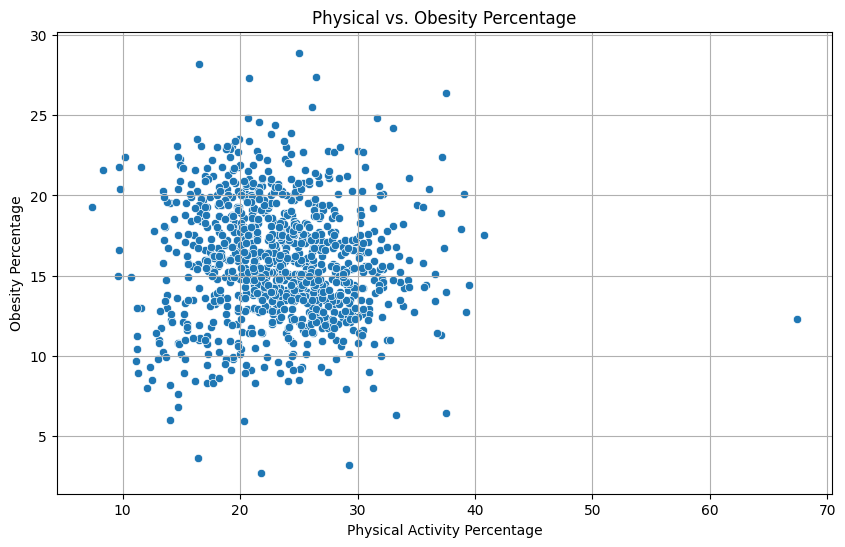

Correlation between Physical and Obesity Percentage: -0.07256574780179506


In [207]:
#plot physical percetange against obesity -> Q048
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical_Percentage', y='Obesity_Percentage', data=phys_obs_df)
plt.title('Physical vs. Obesity Percentage')
plt.xlabel('Physical Activity Percentage')
plt.ylabel('Obesity Percentage')
plt.grid(True)
plt.show()

# Calculating correlation
correlation = phys_obs_df['Physical_Percentage'].corr(phys_obs_df['Obesity_Percentage'])
print(f'Correlation between Physical and Obesity Percentage: {correlation}')


In [208]:
physical_question = ['Q049']
grouped_physical_df = ethnicity_df[ethnicity_df['QuestionID'].isin(physical_question)]
grouped_physical_df = grouped_physical_df.groupby(['YearEnd', 'LocationDesc', 'Race/Ethnicity'])['Data_Value'].mean().reset_index()
grouped_physical_df = grouped_physical_df.rename(columns={"Data_Value": "Physical_Percentage"})
grouped_physical_df = grouped_physical_df[grouped_physical_df['YearEnd'].astype(int) >= 2007]
grouped_physical_df

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage
256,2007,Alaska,American Indian/Alaska Native,18.2
257,2007,Alaska,Hispanic,21.1
258,2007,Alaska,Non-Hispanic White,16.2
259,2007,Arizona,American Indian/Alaska Native,21.8
260,2007,Arizona,Hispanic,27.6
...,...,...,...,...
1220,2019,Texas,Non-Hispanic Black,37.8
1221,2019,Texas,Non-Hispanic White,38.9
1222,2019,Utah,Hispanic,13.1
1223,2019,Utah,Non-Hispanic White,13.0


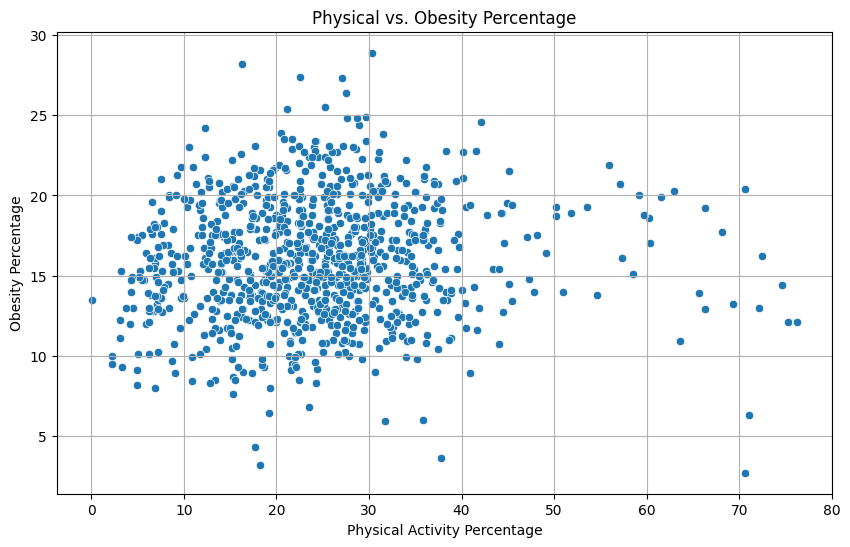

Correlation between Physical and Obesity Percentage: 0.06022351427773444


In [209]:
#CORRELATION WITH Q049
phys_obs_df = pd.merge(grouped_physical_df, grouped_obesity_df, 
                     on=['YearEnd', 'LocationDesc', 'Race/Ethnicity'], 
                     how='inner')
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical_Percentage', y='Obesity_Percentage', data=phys_obs_df)
plt.title('Physical vs. Obesity Percentage')
plt.xlabel('Physical Activity Percentage')
plt.ylabel('Obesity Percentage')
plt.grid(True)
plt.show()

# Calculating correlation
correlation = phys_obs_df['Physical_Percentage'].corr(phys_obs_df['Obesity_Percentage'])
print(f'Correlation between Physical and Obesity Percentage: {correlation}')

In [210]:
#Q048 follows the trend -> keeping it as the table
physical_question = ['Q048']
grouped_physical_df = ethnicity_df[ethnicity_df['QuestionID'].isin(physical_question)]
grouped_physical_df = grouped_physical_df.groupby(['YearEnd', 'LocationDesc', 'Race/Ethnicity'])['Data_Value'].mean().reset_index()
grouped_physical_df = grouped_physical_df.rename(columns={"Data_Value": "Physical_Percentage"})
grouped_physical_df = grouped_physical_df[grouped_physical_df['YearEnd'].astype(int) >= 2007]
grouped_physical_df

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage
0,2007,Alaska,American Indian/Alaska Native,8.3
1,2007,Alaska,Hispanic,20.1
2,2007,Alaska,Non-Hispanic White,21.1
3,2007,Connecticut,Hispanic,18.5
4,2007,Connecticut,Non-Hispanic Black,20.2
...,...,...,...,...
1029,2019,West Virginia,Non-Hispanic White,26.0
1030,2019,Wisconsin,2 or more races,26.8
1031,2019,Wisconsin,Hispanic,18.7
1032,2019,Wisconsin,Non-Hispanic Black,20.6


In [211]:
soda_question = ['Q058']
grouped_soda_df = ethnicity_df[ethnicity_df['QuestionID'].isin(soda_question)]
grouped_soda_df = grouped_soda_df.groupby(['YearEnd', 'LocationDesc', 'Race/Ethnicity'])['Data_Value'].mean().reset_index()
grouped_soda_df = grouped_soda_df.rename(columns={"Data_Value": "Soda_Percentage"})
grouped_soda_df = grouped_soda_df[grouped_soda_df['YearEnd'].astype(int) >= 2007]
grouped_soda_df

,YearEnd,LocationDesc,Race/Ethnicity,Soda_Percentage
0,2007,Alaska,American Indian/Alaska Native,33.2
1,2007,Alaska,Hispanic,21.4
2,2007,Alaska,Non-Hispanic White,18.5
3,2007,Arizona,American Indian/Alaska Native,42.3
4,2007,Arizona,Hispanic,28.0
...,...,...,...,...
1026,2019,Virginia,Asian,7.0
1027,2019,Virginia,Hispanic,14.6
1028,2019,Virginia,Non-Hispanic Black,17.0
1029,2019,Virginia,Non-Hispanic White,17.9


In [212]:
#checking correlation of soda against obesity
childeth_df = pd.merge(phys_obs_df, grouped_soda_df, 
                     on=['YearEnd', 'LocationDesc', 'Race/Ethnicity'], 
                     how='inner')
childeth_df

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage,Soda_Percentage
0,2007,Alaska,American Indian/Alaska Native,18.2,21.6,33.2
1,2007,Alaska,Hispanic,21.1,15.8,21.4
2,2007,Alaska,Non-Hispanic White,16.2,13.8,18.5
3,2007,Arizona,American Indian/Alaska Native,21.8,13.1,42.3
4,2007,Arizona,Hispanic,27.6,18.8,28.0
...,...,...,...,...,...,...
892,2019,Texas,Non-Hispanic Black,37.8,19.8,18.7
893,2019,Texas,Non-Hispanic White,38.9,14.1,25.4
894,2019,Utah,Hispanic,13.1,15.7,9.9
895,2019,Utah,Non-Hispanic White,13.0,11.4,11.8


In [213]:
childeth_df.to_csv("child_ethnicity_obesity_data.csv")

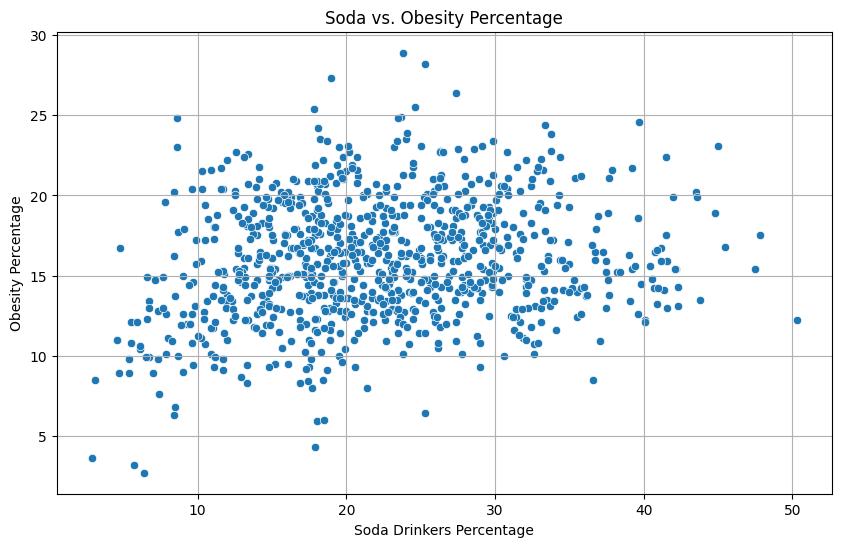

Correlation between Physical and Obesity Percentage: 0.17885651282990853


In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Soda_Percentage', y='Obesity_Percentage', data=childeth_df)
plt.title('Soda vs. Obesity Percentage')
plt.xlabel('Soda Drinkers Percentage')
plt.ylabel('Obesity Percentage')
plt.grid(True)
plt.show()

# Calculating correlation
correlation = childeth_df['Soda_Percentage'].corr(childeth_df['Obesity_Percentage'])
print(f'Correlation between Physical and Obesity Percentage: {correlation}')

In [215]:
childeth_df = childeth_df.sort_values(by=['Race/Ethnicity', 'LocationDesc', 'YearEnd'])


In [216]:
childeth_df.head(20)

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage,Soda_Percentage
115,2009,Alaska,2 or more races,16.8,16.5,19.9
239,2011,Alaska,2 or more races,17.0,13.7,17.5
379,2013,Alaska,2 or more races,14.1,17.6,15.9
503,2015,Alaska,2 or more races,15.2,17.3,11.1
641,2017,Alaska,2 or more races,17.6,21.7,11.6
776,2019,Alaska,2 or more races,19.6,21.6,10.9
510,2015,Arkansas,2 or more races,18.6,14.6,29.0
517,2015,Connecticut,2 or more races,14.1,20.2,15.6
654,2017,Connecticut,2 or more races,11.7,13.1,14.8
10,2007,Delaware,2 or more races,19.8,21.7,39.2


In [217]:
childeth_df['PanelID'] = (childeth_df['LocationDesc'] + "_" + childeth_df['Race/Ethnicity'])
childeth_df.head(20)

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage,Soda_Percentage,PanelID
115,2009,Alaska,2 or more races,16.8,16.5,19.9,Alaska_2 or more races
239,2011,Alaska,2 or more races,17.0,13.7,17.5,Alaska_2 or more races
379,2013,Alaska,2 or more races,14.1,17.6,15.9,Alaska_2 or more races
503,2015,Alaska,2 or more races,15.2,17.3,11.1,Alaska_2 or more races
641,2017,Alaska,2 or more races,17.6,21.7,11.6,Alaska_2 or more races
776,2019,Alaska,2 or more races,19.6,21.6,10.9,Alaska_2 or more races
510,2015,Arkansas,2 or more races,18.6,14.6,29.0,Arkansas_2 or more races
517,2015,Connecticut,2 or more races,14.1,20.2,15.6,Connecticut_2 or more races
654,2017,Connecticut,2 or more races,11.7,13.1,14.8,Connecticut_2 or more races
10,2007,Delaware,2 or more races,19.8,21.7,39.2,Delaware_2 or more races


In [218]:
panel_map = {}
count = 0
for str_panel in list(childeth_df['PanelID'].unique()):
    panel_map[str_panel] = count
    count += 1
childeth_df['PanelID'] = childeth_df['PanelID'].replace(panel_map)
childeth_df

/tmp/ipykernel_33/810132823.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  childeth_df['PanelID'] = childeth_df['PanelID'].replace(panel_map)


,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage,Soda_Percentage,PanelID
115,2009,Alaska,2 or more races,16.8,16.5,19.9,0
239,2011,Alaska,2 or more races,17.0,13.7,17.5,0
379,2013,Alaska,2 or more races,14.1,17.6,15.9,0
503,2015,Alaska,2 or more races,15.2,17.3,11.1,0
641,2017,Alaska,2 or more races,17.6,21.7,11.6,0
...,...,...,...,...,...,...,...
112,2007,Wyoming,Non-Hispanic White,21.5,10.9,27.4,204
236,2009,Wyoming,Non-Hispanic White,22.5,12.1,26.0,204
375,2011,Wyoming,Non-Hispanic White,20.8,11.4,25.3,204
500,2013,Wyoming,Non-Hispanic White,23.1,12.0,23.8,204


In [219]:
childeth_df.head(20)

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage,Soda_Percentage,PanelID
115,2009,Alaska,2 or more races,16.8,16.5,19.9,0
239,2011,Alaska,2 or more races,17.0,13.7,17.5,0
379,2013,Alaska,2 or more races,14.1,17.6,15.9,0
503,2015,Alaska,2 or more races,15.2,17.3,11.1,0
641,2017,Alaska,2 or more races,17.6,21.7,11.6,0
776,2019,Alaska,2 or more races,19.6,21.6,10.9,0
510,2015,Arkansas,2 or more races,18.6,14.6,29.0,1
517,2015,Connecticut,2 or more races,14.1,20.2,15.6,2
654,2017,Connecticut,2 or more races,11.7,13.1,14.8,2
10,2007,Delaware,2 or more races,19.8,21.7,39.2,3


In [220]:
meat_production = pd.read_csv("/kaggle/input/datathon/Meat_Stats_Meat_Production.csv")
meat_production

,Date,Year,Month,Unit,Production,Animal,Commercial or Federally Inspected,Type of Meat
0,Dec-2023,2023,12,Million Pounds,"2,189.80",Beef,Commercial,Red Meat
1,Nov-2023,2023,11,Million Pounds,"2,280.90",Beef,Commercial,Red Meat
2,Oct-2023,2023,10,Million Pounds,"2,340.90",Beef,Commercial,Red Meat
3,Sep-2023,2023,9,Million Pounds,"2,149.40",Beef,Commercial,Red Meat
4,Aug-2023,2023,8,Million Pounds,"2,363.50",Beef,Commercial,Red Meat
...,...,...,...,...,...,...,...,...
13590,May-1921,1921,5,Million Pounds,NaN,Turkey,Federally Inspected,Poultry
13591,Apr-1921,1921,4,Million Pounds,NaN,Turkey,Federally Inspected,Poultry
13592,Mar-1921,1921,3,Million Pounds,NaN,Turkey,Federally Inspected,Poultry
13593,Feb-1921,1921,2,Million Pounds,NaN,Turkey,Federally Inspected,Poultry


In [221]:
meat_production = meat_production.dropna(subset=["Production"])
meat_production = meat_production.sort_values(by=["Year",  "Month"], ascending = [True,True])

In [222]:
meat_production

,Date,Year,Month,Unit,Production,Animal,Commercial or Federally Inspected,Type of Meat
6178,Jan-1921,1921,1,Million Pounds,358,Beef,Federally Inspected,Red Meat
7414,Jan-1921,1921,1,Million Pounds,27,Veal,Federally Inspected,Red Meat
8650,Jan-1921,1921,1,Million Pounds,565,Pork,Federally Inspected,Red Meat
9886,Jan-1921,1921,1,Million Pounds,44,Lamb and Mutton,Federally Inspected,Red Meat
12358,Jan-1921,1921,1,Million Pounds,393,Turkey,Federally Inspected,Poultry
...,...,...,...,...,...,...,...,...
7415,Dec-2023,2023,12,Million Pounds,"2,332.40",Pork,Federally Inspected,Red Meat
8651,Dec-2023,2023,12,Million Pounds,9.5,Lamb and Mutton,Federally Inspected,Red Meat
9887,Dec-2023,2023,12,Million Pounds,"3,615.00",Broilers,Federally Inspected,Poultry
11123,Dec-2023,2023,12,Million Pounds,41.5,Other Chicken,Federally Inspected,Poultry


In [223]:
meat_production.isna().sum()

Date                                 0
Year                                 0
Month                                0
Unit                                 0
Production                           0
Animal                               0
Commercial or Federally Inspected    0
Type of Meat                         0
dtype: int64

In [224]:
meat_production['Production'] = pd.to_numeric(meat_production['Production'], errors='coerce')
annualmeat_df = meat_production.groupby('Year')['Production'].sum().reset_index()


In [225]:
annualmeat_df 

,Year,Production
0,1921,10175.0
1,1922,10656.0
2,1923,12067.0
3,1924,11984.0
4,1925,11284.0
...,...,...
98,2019,6777.1
99,2020,6657.1
100,2021,6503.7
101,2022,6159.5


In [226]:
annualmeat_df['Production_lag_1'] = annualmeat_df['Production'].shift(2)
annualmeat_df['Production_lag_2'] = annualmeat_df['Production'].shift(3)
annualmeat_df['Production_lag_3'] = annualmeat_df['Production'].shift(4)
annualmeat_df['Production_lag_4'] = annualmeat_df['Production'].shift(5)
annualmeat_df

,Year,Production,Production_lag_1,Production_lag_2,Production_lag_3,Production_lag_4
0,1921,10175.0,NaN,NaN,NaN,NaN
1,1922,10656.0,NaN,NaN,NaN,NaN
2,1923,12067.0,10175.0,NaN,NaN,NaN
3,1924,11984.0,10656.0,10175.0,NaN,NaN
4,1925,11284.0,12067.0,10656.0,10175.0,NaN
...,...,...,...,...,...,...
98,2019,6777.1,6958.0,6949.7,6615.8,6712.3
99,2020,6657.1,6873.1,6958.0,6949.7,6615.8
100,2021,6503.7,6777.1,6873.1,6958.0,6949.7
101,2022,6159.5,6657.1,6777.1,6873.1,6958.0


In [227]:
annualmeat_df = annualmeat_df.dropna(subset=['Production_lag_1', 'Production_lag_2', 'Production_lag_3', 'Production_lag_4'])
annualmeat_df

,Year,Production,Production_lag_1,Production_lag_2,Production_lag_3,Production_lag_4
5,1926,11467.0,11984.0,12067.0,10656.0,10175.0
6,1927,11386.0,11284.0,11984.0,12067.0,10656.0
7,1928,11438.0,11467.0,11284.0,11984.0,12067.0
8,1929,11297.0,11386.0,11467.0,11284.0,11984.0
9,1930,10990.0,11438.0,11386.0,11467.0,11284.0
...,...,...,...,...,...,...
98,2019,6777.1,6958.0,6949.7,6615.8,6712.3
99,2020,6657.1,6873.1,6958.0,6949.7,6615.8
100,2021,6503.7,6777.1,6873.1,6958.0,6949.7
101,2022,6159.5,6657.1,6777.1,6873.1,6958.0


In [228]:
annualmeat_df.rename(columns={'Year': 'YearEnd'}, inplace=True)

/tmp/ipykernel_33/1857039607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annualmeat_df.rename(columns={'Year': 'YearEnd'}, inplace=True)


In [229]:
annualmeat_df

,YearEnd,Production,Production_lag_1,Production_lag_2,Production_lag_3,Production_lag_4
5,1926,11467.0,11984.0,12067.0,10656.0,10175.0
6,1927,11386.0,11284.0,11984.0,12067.0,10656.0
7,1928,11438.0,11467.0,11284.0,11984.0,12067.0
8,1929,11297.0,11386.0,11467.0,11284.0,11984.0
9,1930,10990.0,11438.0,11386.0,11467.0,11284.0
...,...,...,...,...,...,...
98,2019,6777.1,6958.0,6949.7,6615.8,6712.3
99,2020,6657.1,6873.1,6958.0,6949.7,6615.8
100,2021,6503.7,6777.1,6873.1,6958.0,6949.7
101,2022,6159.5,6657.1,6777.1,6873.1,6958.0


In [230]:
#Stationarity test on meat Production
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(annualmeat_df['Production'])
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]
adf_statistic, p_value, critical_values

(-1.6168885563275037,
 0.4743608809762547,
 {'1%': -3.4996365338407074,
  '5%': -2.8918307730370025,
  '10%': -2.5829283377617176})

In [231]:
from statsmodels.tsa.stattools import adfuller

# Apply differencing to the 'Production' column
annualmeat_df['Production_diff'] = annualmeat_df['Production'].diff()

annualmeat_df_diff_dropped = annualmeat_df.dropna(subset=['Production_diff'])

# Augmented Dickey-Fuller test on the differenced data
adf_result_diff = adfuller(annualmeat_df_diff_dropped['Production_diff'])

# Output results of the ADF test
adf_statistic_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]
critical_values_diff = adf_result_diff[4]

adf_statistic_diff, p_value_diff, critical_values_diff

/tmp/ipykernel_33/3590510984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annualmeat_df['Production_diff'] = annualmeat_df['Production'].diff()


(-10.282613904466269,
 3.74531149659709e-18,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446})

In [232]:
annualmeat_df
#lag1-lag2, lag2-lag3, lag3-lag4

,YearEnd,Production,Production_lag_1,Production_lag_2,Production_lag_3,Production_lag_4,Production_diff
5,1926,11467.0,11984.0,12067.0,10656.0,10175.0,NaN
6,1927,11386.0,11284.0,11984.0,12067.0,10656.0,-81.0
7,1928,11438.0,11467.0,11284.0,11984.0,12067.0,52.0
8,1929,11297.0,11386.0,11467.0,11284.0,11984.0,-141.0
9,1930,10990.0,11438.0,11386.0,11467.0,11284.0,-307.0
...,...,...,...,...,...,...,...
98,2019,6777.1,6958.0,6949.7,6615.8,6712.3,-96.0
99,2020,6657.1,6873.1,6958.0,6949.7,6615.8,-120.0
100,2021,6503.7,6777.1,6873.1,6958.0,6949.7,-153.4
101,2022,6159.5,6657.1,6777.1,6873.1,6958.0,-344.2


In [233]:
annualmeat_df['Production_diff_lag_1'] = annualmeat_df['Production_lag_1']- annualmeat_df['Production_lag_2']
annualmeat_df['Production_diff_lag_2'] = annualmeat_df['Production_lag_2']- annualmeat_df['Production_lag_3']
annualmeat_df['Production_diff_lag_3'] = annualmeat_df['Production_lag_3']- annualmeat_df['Production_lag_4']

/tmp/ipykernel_33/2585659213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annualmeat_df['Production_diff_lag_1'] = annualmeat_df['Production_lag_1']- annualmeat_df['Production_lag_2']
/tmp/ipykernel_33/2585659213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annualmeat_df['Production_diff_lag_2'] = annualmeat_df['Production_lag_2']- annualmeat_df['Production_lag_3']
/tmp/ipykernel_33/2585659213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [234]:
annualmeat_df = annualmeat_df.drop(columns=['Production', 'Production_lag_1', 'Production_lag_2', 'Production_lag_3', 'Production_lag_4'])

In [235]:
annualmeat_df

,YearEnd,Production_diff,Production_diff_lag_1,Production_diff_lag_2,Production_diff_lag_3
5,1926,NaN,-83.0,1411.0,481.0
6,1927,-81.0,-700.0,-83.0,1411.0
7,1928,52.0,183.0,-700.0,-83.0
8,1929,-141.0,-81.0,183.0,-700.0
9,1930,-307.0,52.0,-81.0,183.0
...,...,...,...,...,...
98,2019,-96.0,8.3,333.9,-96.5
99,2020,-120.0,-84.9,8.3,333.9
100,2021,-153.4,-96.0,-84.9,8.3
101,2022,-344.2,-120.0,-96.0,-84.9


In [236]:
annualmeat_df = annualmeat_df.dropna(subset=['Production_diff'])
annualmeat_df

,YearEnd,Production_diff,Production_diff_lag_1,Production_diff_lag_2,Production_diff_lag_3
6,1927,-81.0,-700.0,-83.0,1411.0
7,1928,52.0,183.0,-700.0,-83.0
8,1929,-141.0,-81.0,183.0,-700.0
9,1930,-307.0,52.0,-81.0,183.0
10,1931,162.0,-141.0,52.0,-81.0
...,...,...,...,...,...
98,2019,-96.0,8.3,333.9,-96.5
99,2020,-120.0,-84.9,8.3,333.9
100,2021,-153.4,-96.0,-84.9,8.3
101,2022,-344.2,-120.0,-96.0,-84.9


In [237]:
print(type(childeth_df['YearEnd'].iloc[0]))
print(type(annualmeat_df['YearEnd'].iloc[0]))

<class 'str'>
<class 'numpy.int64'>


In [238]:
childeth_df['YearEnd'] = childeth_df['YearEnd'].astype(int)

In [239]:
print(type(childeth_df['YearEnd'].iloc[0]))
print(type(annualmeat_df['YearEnd'].iloc[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [240]:
childeth_df = pd.merge(childeth_df, annualmeat_df, 
                     on=['YearEnd'], 
                     how='inner')

In [241]:
childeth_df.head(20)

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage,Soda_Percentage,PanelID,Production_diff,Production_diff_lag_1,Production_diff_lag_2,Production_diff_lag_3
0,2009,Alaska,2 or more races,16.8,16.5,19.9,0,-592.3,198.7,150.4,31.5
1,2011,Alaska,2 or more races,17.0,13.7,17.5,0,133.8,-592.3,351.3,198.7
2,2013,Alaska,2 or more races,14.1,17.6,15.9,0,-169.0,133.8,-79.5,-592.3
3,2015,Alaska,2 or more races,15.2,17.3,11.1,0,-96.5,-169.0,178.5,133.8
4,2017,Alaska,2 or more races,17.6,21.7,11.6,0,8.3,-96.5,-156.8,-169.0
5,2019,Alaska,2 or more races,19.6,21.6,10.9,0,-96.0,8.3,333.9,-96.5
6,2015,Arkansas,2 or more races,18.6,14.6,29.0,1,-96.5,-169.0,178.5,133.8
7,2015,Connecticut,2 or more races,14.1,20.2,15.6,2,-96.5,-169.0,178.5,133.8
8,2017,Connecticut,2 or more races,11.7,13.1,14.8,2,8.3,-96.5,-156.8,-169.0
9,2007,Delaware,2 or more races,19.8,21.7,39.2,3,198.7,31.5,-278.7,-83.6


In [242]:
childeth_df

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage,Soda_Percentage,PanelID,Production_diff,Production_diff_lag_1,Production_diff_lag_2,Production_diff_lag_3
0,2009,Alaska,2 or more races,16.8,16.5,19.9,0,-592.3,198.7,150.4,31.5
1,2011,Alaska,2 or more races,17.0,13.7,17.5,0,133.8,-592.3,351.3,198.7
2,2013,Alaska,2 or more races,14.1,17.6,15.9,0,-169.0,133.8,-79.5,-592.3
3,2015,Alaska,2 or more races,15.2,17.3,11.1,0,-96.5,-169.0,178.5,133.8
4,2017,Alaska,2 or more races,17.6,21.7,11.6,0,8.3,-96.5,-156.8,-169.0
...,...,...,...,...,...,...,...,...,...,...,...
892,2007,Wyoming,Non-Hispanic White,21.5,10.9,27.4,204,198.7,31.5,-278.7,-83.6
893,2009,Wyoming,Non-Hispanic White,22.5,12.1,26.0,204,-592.3,198.7,150.4,31.5
894,2011,Wyoming,Non-Hispanic White,20.8,11.4,25.3,204,133.8,-592.3,351.3,198.7
895,2013,Wyoming,Non-Hispanic White,23.1,12.0,23.8,204,-169.0,133.8,-79.5,-592.3


In [245]:
childeth_df

,YearEnd,LocationDesc,Race/Ethnicity,Physical_Percentage,Obesity_Percentage,Soda_Percentage,PanelID,Production_diff,Production_diff_lag_1,Production_diff_lag_2,Production_diff_lag_3
0,2009,Alaska,2 or more races,16.8,16.5,19.9,0,-592.3,198.7,150.4,31.5
1,2011,Alaska,2 or more races,17.0,13.7,17.5,0,133.8,-592.3,351.3,198.7
2,2013,Alaska,2 or more races,14.1,17.6,15.9,0,-169.0,133.8,-79.5,-592.3
3,2015,Alaska,2 or more races,15.2,17.3,11.1,0,-96.5,-169.0,178.5,133.8
4,2017,Alaska,2 or more races,17.6,21.7,11.6,0,8.3,-96.5,-156.8,-169.0
...,...,...,...,...,...,...,...,...,...,...,...
892,2007,Wyoming,Non-Hispanic White,21.5,10.9,27.4,204,198.7,31.5,-278.7,-83.6
893,2009,Wyoming,Non-Hispanic White,22.5,12.1,26.0,204,-592.3,198.7,150.4,31.5
894,2011,Wyoming,Non-Hispanic White,20.8,11.4,25.3,204,133.8,-592.3,351.3,198.7
895,2013,Wyoming,Non-Hispanic White,23.1,12.0,23.8,204,-169.0,133.8,-79.5,-592.3


In [246]:
childeth_df.to_csv("child_ethnicity_obesity_data.csv")

In [ ]:
import pandas as pd
all_stock_and_etfs = pd.read_csv("/kaggle/input/datathon/all_stock_and_etfs.csv")
all_stock_and_etfs

In [ ]:
stock_descriptions = pd.read_csv("/kaggle/input/datathon/stock_descriptions.csv")
stock_desc